In [58]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [59]:
# The starter code is short and simple, take a look!
from starter import *

# Phase 1 - Create Inputs

In [60]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released
import random

def small(G: nx.Graph):
    for i in range(100):
        for j in range(100):
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))
    
def medium(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 299)
        rand_v2 = random.randint(0, 299)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))
        
    
def large(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 999)
        rand_v2 = random.randint(0, 999)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))

In [62]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

# Phase 2 - Implement your Solver

In [63]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    
    #random
    for i in range(G.number_of_nodes()):
        G.nodes[i]['team'] = i % 2 + 1
    random_score = score(G)
    
    team_1_list = []
    team_2_list = []
    grouped_vees = []
    max_team_count = G.number_of_nodes() // 2
    sorted_edges = G.edges.data('weight')
    sorted_edges = sorted(sorted_edges, key=lambda x: -x[2])
    for (v1, v2, w) in sorted_edges:
        if len(team_1_list) > max_team_count or len(team_2_list) > max_team_count:
            break
        if v1 in grouped_vees and v2 in grouped_vees: #both already have a group
            continue
        elif v1 in grouped_vees: #v1 is in a group already
            if v1 in team_1_list: #v1 in team1; v2 goes to team2
                G.nodes[v2]['team'] = 2
                team_2_list.append(v2)
                grouped_vees.append(v2)
            else: #v1 in team2, v2 goes to team1
                G.nodes[v2]['team'] = 1
                team_1_list.append(v2)
                grouped_vees.append(v2)
        elif v2 in grouped_vees: #v2 is in a group already
            if v2 in team_1_list: #v2 in team1; v1 goes to team2
                G.nodes[v1]['team'] = 2
                team_2_list.append(v1)
                grouped_vees.append(v1)
            else: #v2 in team2; v1 goes to team1
                G.nodes[v1]['team'] = 1
                team_1_list.append(v2)
                grouped_vees.append(v2)
        else: #both are not in groups yet, can be optimized later
            G.nodes[v1]['team'] = 1
            G.nodes[v2]['team'] = 2
            team_1_list.append(v1)
            team_2_list.append(v2)
            grouped_vees.append(v1)
            grouped_vees.append(v2)
    #do the rest
    for i in range(G.number_of_nodes()):
        if i in grouped_vees:
            continue
        if len(team_1_list) < max_team_count + 1:
            G.nodes[i]['team'] = 1
            team_1_list.append(i)
            grouped_vees.append(i)
        else: 
            G.nodes[i]['team'] = 2
            team_2_list.append(i)
            grouped_vees.append(i)
    wooo_score = score(G)
    if random_score > wooo_score:
        for i in range(G.number_of_nodes()):
            G.nodes[i]['team'] = i % 2 + 1

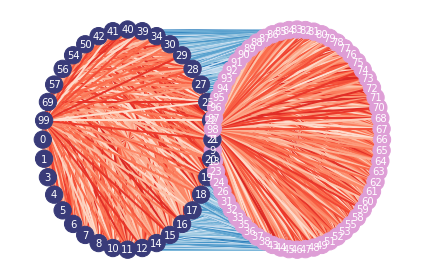

2389043.7708505495

In [64]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [65]:
run(solve, 'small.in', 'small.out')

small.in: cost 2389043.7708505495


In [68]:
run_all(solve, 'inputs', 'output')
tar('output')

  0%|          | 0/778 [00:00<?, ?it/s]

inputs/large1.in: cost 3110292.828182846
inputs/large10.in: cost 2960119.660390012
inputs/large100.in: cost 4698272.828182846
inputs/large101.in: cost 2675988.359807201
inputs/large102.in: cost 3647698.7708505495
inputs/large103.in: cost 2497287.828182846
inputs/large104.in: cost 3847050.359807201
inputs/large105.in: cost 999272.9322435693
inputs/large106.in: cost 248508.8281828459
inputs/large107.in: cost 4943272.93224357
inputs/large108.in: cost 500272.8281828459
inputs/large109.in: cost 1747603.8281828458
inputs/large11.in: cost 989072.828182846
inputs/large110.in: cost 272.9322435692428
inputs/large111.in: cost 4345073.113437418
inputs/large112.in: cost 4738221.563694901
inputs/large113.in: cost 1890554.1350622333
inputs/large114.in: cost 1.2868960883071808e+21
inputs/large115.in: cost 872.9322435692428
inputs/large116.in: cost 490272.8281828459
inputs/large117.in: cost 996275.9322435693
inputs/large118.in: cost 2483156.828182846
inputs/large119.in: cost 1663217.8281828458
inputs/l